In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [487]:
t_data = pd.read_csv("trainData.csv", header = None) 
tl_data = pd.read_csv("trainLabels.csv", header = None)

In [69]:
t_data.shape

(5000, 3001)

In [488]:
X = t_data.iloc[0:t_data.shape[0],1:t_data.shape[1]].values   #[a:b,c:d]
Y = tl_data.iloc[0:tl_data.shape[0],1].values

In [489]:
X.shape

(5000, 3000)

In [490]:
X = np.transpose(X)
a = [np.full(5000,1)]
X = np.append(X,a,0)
X.shape

(3001, 5000)

In [94]:
lamb = [0.01, 0.1,0.5,0.9 ,1,2, 10, 100, 1000]

In [491]:
def ridge(X,Y,lam):
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D)
    return W                              #, W[W.shape[0]-1]

In [492]:
ans = []
bias = []
for lam in lamb:
    w,b = ridge(X,Y,lam) 
    ans.append(w)
    bias.append(b)

ValueError: too many values to unpack (expected 2)

In [97]:
v_data = pd.read_csv("valData.csv",header = None)
vl_data = pd.read_csv("valLabels.csv",header = None)
V = v_data.iloc[0:v_data.shape[0],1:v_data.shape[1]].values
vl = vl_data.iloc[0:vl_data.shape[0],1].values
V = np.transpose(V)
b = [np.full(5000,1)]
V = np.append(V,b,0)
vl.shape


(5000,)

In [98]:
errm = []
for w in ans:
    pred = np.dot(V.T,w)
    err = (vl - pred)
    sqerr = np.sqrt(err ** 2)
    errm.append(sqerr.mean())
    

In [106]:
lamb,errm

([0.01, 0.1, 0.5, 0.9, 1, 2, 10, 100, 1000],
 [2.028466559026601,
  1.7015585821477532,
  1.5686724383929087,
  1.5684913270369405,
  1.5713604019165042,
  1.6099133659890994,
  1.853188840922281,
  2.8041385994138617,
  13.872439014664558])

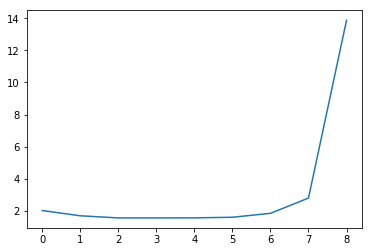

In [101]:
plt.plot(errm)

In [79]:
W = ans[2]
W.shape

(3001,)

In [82]:
test = pd.read_csv('testData.csv', header = None)
t = test.iloc[0:test.shape[0],1:test.shape[1]].values
t = np.transpose(t)
b = [np.full(5000,1)]
t = np.append(t,b,0)
t.shape


(3001, 5000)

In [83]:
pred = np.dot(t.T,W)

In [87]:
pred.shape

(5000,)

In [90]:
id = np.arange(0,5000)

In [89]:
df = pd.DataFrame()

In [91]:
df['Id'] = id

In [92]:
df['Prediction'] = pred

In [297]:
df.shape

(5000, 3)

In [93]:
df.to_csv("predTestLabels1.csv")

In [59]:
test = pd.read_csv('testData.csv', header = None)

In [61]:
test.shape

(5000, 3001)

In [109]:
def loocv()

(5000, 3001)

In [159]:
def Loocv(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    W = ridge(X,Y,lam)
    for i in (0,4999):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - np.dot(np.dot(xi.T,Cinv),xi)))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    rmse = np.sqrt(add/5000)
    return rmse
        
        
        
    

In [162]:
rmse = []
for lam in lamb:
    rmse.append(Loocv(X,Y,lam))
    
   
    

    

In [170]:
for i in range (0,8):
    print(rmse[i])
    print(lamb[i])

0.018315441838935468
0.01
0.012554760691785714
0.1
0.010166886297068
0.5
0.013252253166559477
0.9
0.014183979798877392
1
0.02192717394474665
2
0.03887993279372984
10
0.026328987330486026
100


In [171]:
Z = Loocv(,Y,100)

In [172]:
Z

0.026328987330486026

In [493]:
W = ridge(X,Y,0.7)

In [251]:
pred = np.dot(V.T,W)
err = vl-pred
add = 0

In [252]:
for y in err:
    add = add + (y**2)
rmse = np.sqrt(add/5000)
rmse

1.9835860902507114

In [149]:
C = (np.dot(X,X.T) + (1*np.identity(X.shape[0])))
Cinv = np.linalg.inv(C)
Cinv.shape

(3001, 3001)

In [261]:
Z.shape

(10000, 3001)

In [265]:
M = V.T[0:4000]
N = vl[0:4000]

In [269]:
Mv = V.T[4000:5000]
Nv = vl[4000:5000]

In [272]:
Mv.shape
Nv.shape

(1000,)

In [276]:
M.shape
#N.shape
X.shape

(3001, 5000)

In [274]:
Z = np.append(X.T,M,axis = 0)

In [278]:
Z = Z.T

In [279]:
S = np.append(Y,N,axis = 0)
S.shape

(9000,)

In [280]:
W = ridge(Z,S,1)

In [281]:
pred = np.dot(Mv,W)
err = Nv-pred
err.shape

(1000,)

In [282]:
add= 0
for y in err:
    add = add + (y**2)
rmse = np.sqrt(add/5000)
rmse

0.8442176211615625

In [283]:
test = pd.read_csv('testData.csv', header = None)
t = test.iloc[0:test.shape[0],1:test.shape[1]].values
t = np.transpose(t)
b = [np.full(5000,1)]
t = np.append(t,b,0)
t.shape


(3001, 5000)

In [284]:
W.shape

(3001,)

In [285]:
pred_final = np.dot(t.T, W)

In [286]:
pred_final.shape

(5000,)

In [293]:
id1 = np.arange(0,5000)

In [299]:
df1 = pd.DataFrame()
df1['id'] = id1
df1['Prediction'] = pred_final

In [305]:
df1.tail()

,id,Prediction
4995,4995,86.541809
4996,4996,87.319291
4997,4997,88.473566
4998,4998,87.333484
4999,4999,88.877369


In [304]:
df1.to_csv("predTestLabels1.csv")

In [298]:
df1.shape

(5000, 2)

In [385]:
data = pd.read_csv('featureTypes.txt', sep=" ", header=None)

In [386]:
data.head()

,0,1,2
0,flavors,raspberries,cherries
1,cherry,cocoa,NaN
2,age,years,NaN
3,different,NaN,NaN
4,marmalade,NaN,NaN


In [317]:
Z  = X.T

In [344]:
t_data = pd.read_csv("trainData.csv", header = None) 
t_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
o = t_data.iloc[:,1:3001].mean()
o.tail()

2996    0.005224
2997    0.004936
2998    0.000440
2999    0.000591
3000    0.000395
dtype: float64

In [447]:
d = o.values
d.shape

(3000,)

In [384]:
dd = pd.DataFrame()

In [439]:
te_data = pd.read_csv("testData.csv", header = None) 

In [435]:
data['mean'] = d

In [452]:
d = pd.Series(d)

In [462]:
t_data = pd.read_csv("trainData.csv", header = None) 
t_data.iloc[0:1,]
t_data = t_data.iloc[0:t_data.shape[0],1:t_data.shape[1]]
t_data.iloc[0:2,]

,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
t_data.append(d,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
4,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.224
5,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
6,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
7,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
8,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000
9,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000


In [464]:
t_data = t_data.transpose()

In [465]:
t_data.shape

(3000, 5000)

In [477]:
pd.set_option("display.precision", 8)

In [483]:
t_data.iloc[(t_data.iloc[:,4999:5000])>0.003]

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)